# Author: Minhaj Uddin Meraj¶
# TASK 3: Exploratory Data Analysis - Retail

●Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

Exploratory data analysis is generally cross-classified in two ways. First, each method is either non-graphical or graphical. And second, each method is either univariate or multivariate (usually just bivariate).

# Importing Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [48]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [49]:
df.shape # Number of elements in each dimension of an arr

(9994, 13)

In [50]:
df.info() # Returns the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [51]:
df.describe() # Gives the statistical data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [52]:
df.isnull().sum() # Checks the missing values.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [53]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [54]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Checking for the duplicate data.

In [55]:
df.duplicated().sum() # Checks the duplicated data if yes then dropping duplicate data

17

In [56]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [57]:
col = ['Postal Code'] # Deleting irrelevant Column
df1 = df.drop(columns=col,axis=1)

In [58]:
df1.corr() # Correlation between variables

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [59]:
df1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis

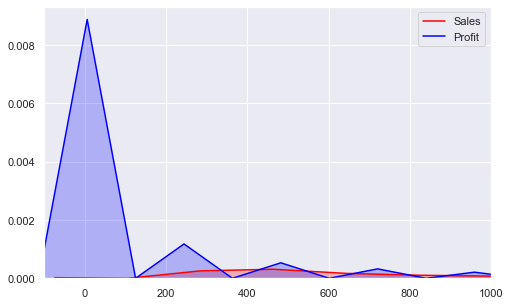

In [60]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='Blue',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

Profit is more than that of sale but there are some areas where profit could be increased.

# Analysis Based on the Catagory

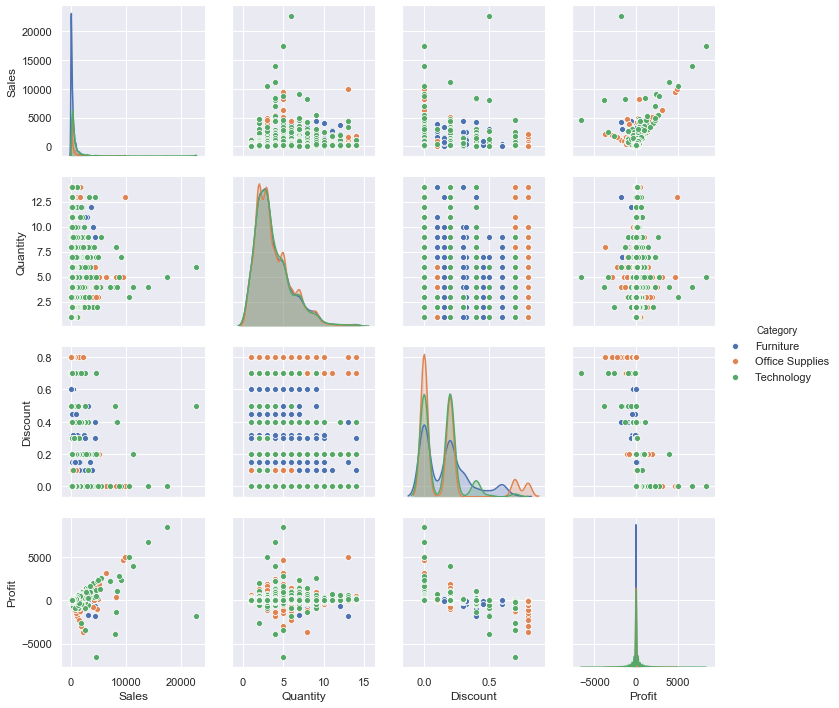

In [61]:
sns.pairplot(df1,hue='Category')

So, the data here is not normal as revealed by this histogram graph inside the pairplot.

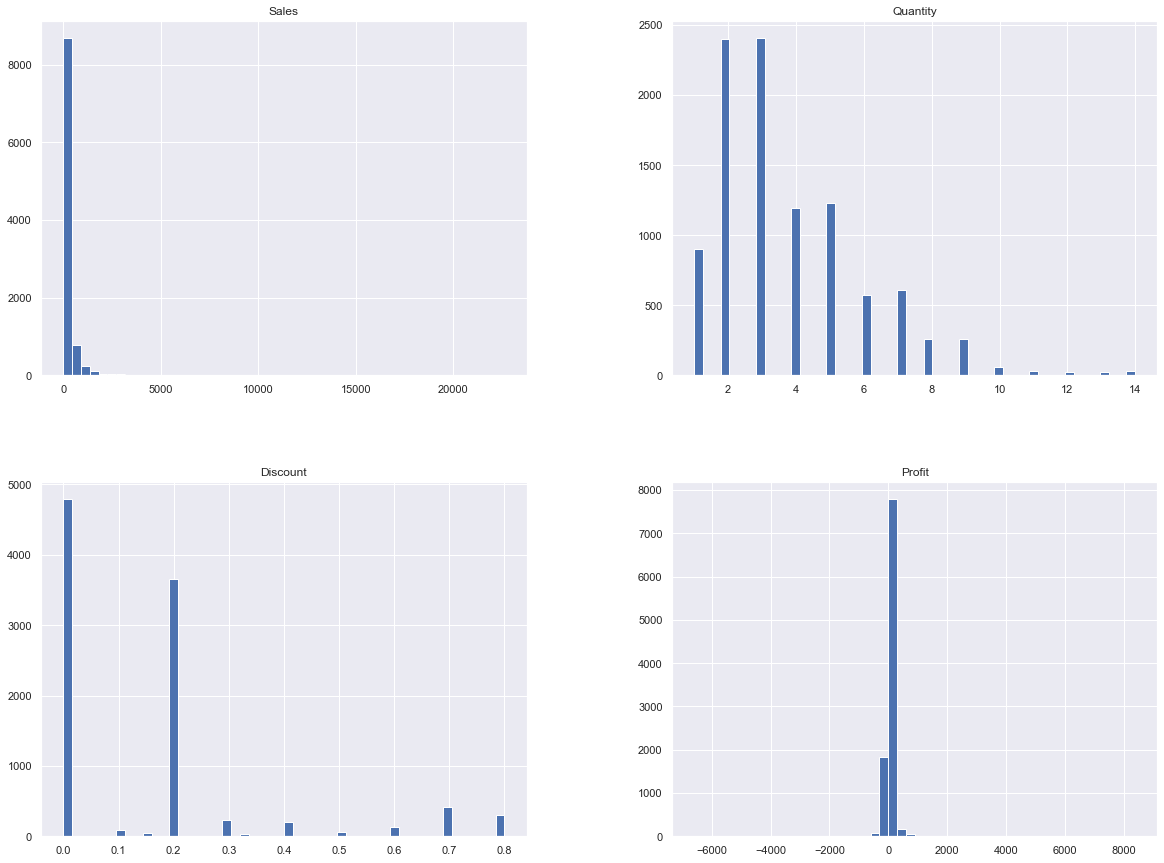

In [62]:
df1.hist(bins=50,figsize=(20,15))
plt.show()

For Conformation,let's check with another colmuns

# Based on Region

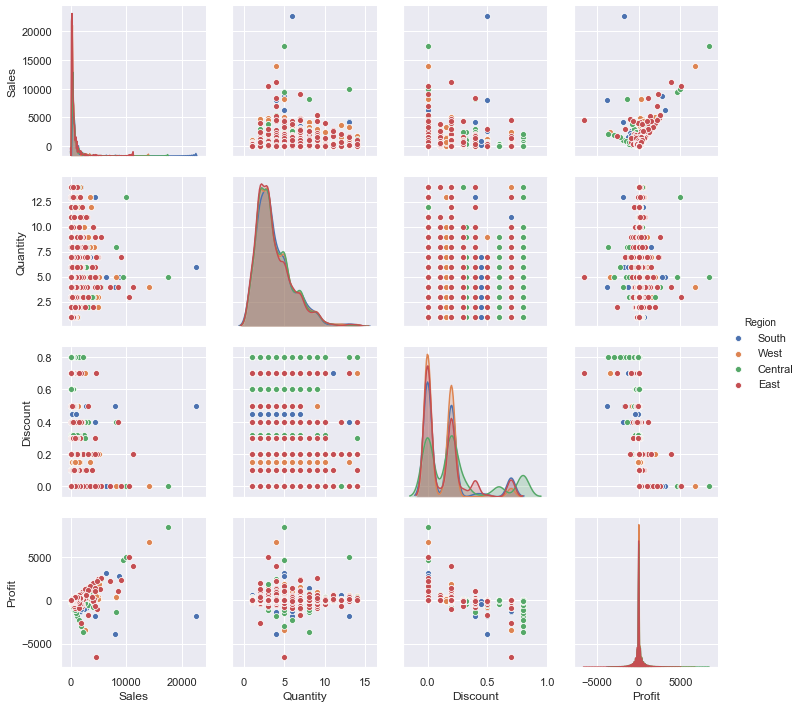

In [63]:
sns.pairplot(df1,hue='Region')

# Based on the segment

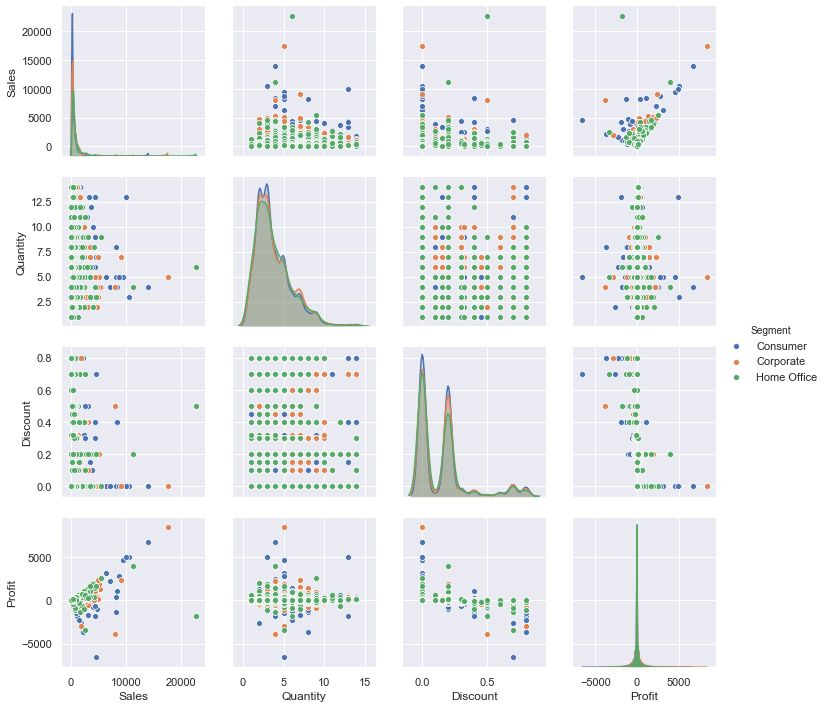

In [64]:
sns.pairplot(df1,hue='Segment')

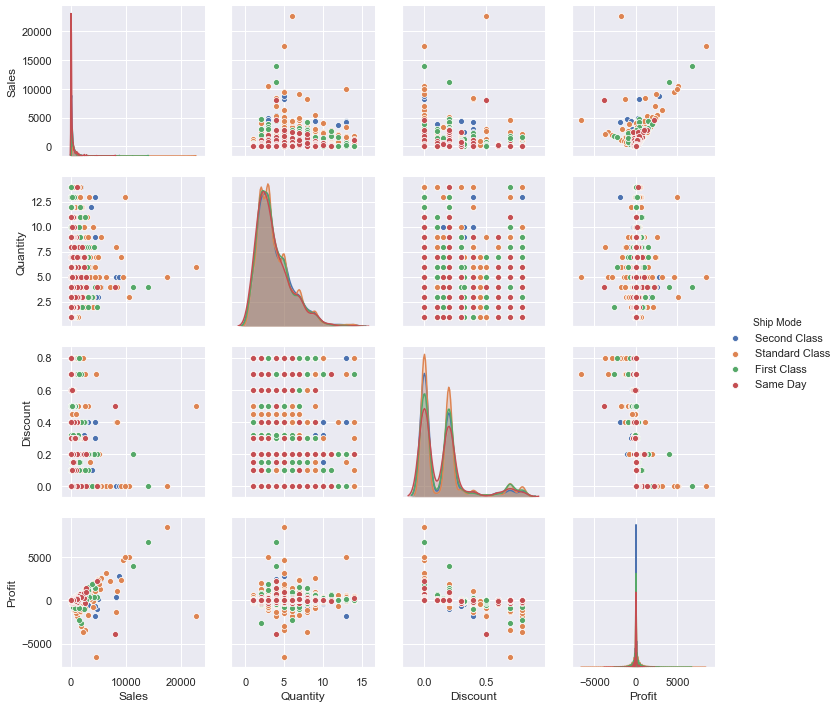

In [97]:
sns.pairplot(df1,hue= "Ship Mode")

As you can see that the data here is not normal.

In [65]:
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


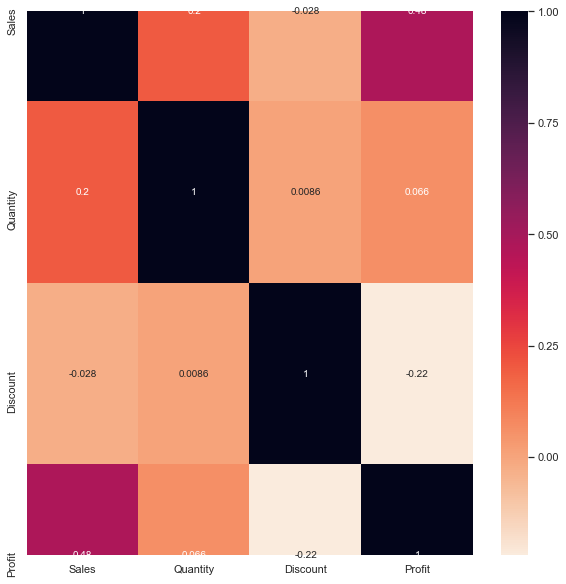

In [66]:
plt.subplots(figsize=(10,10))
sns.heatmap(df1.corr(),cmap='rocket_r',annot=True)

From above Heatmap:

o Sales and Profit are Moderately Correlated.

o Discount and Profit are Negatively Correlated

o Quantity and Profit are less Moderately Correlated

# Count plot

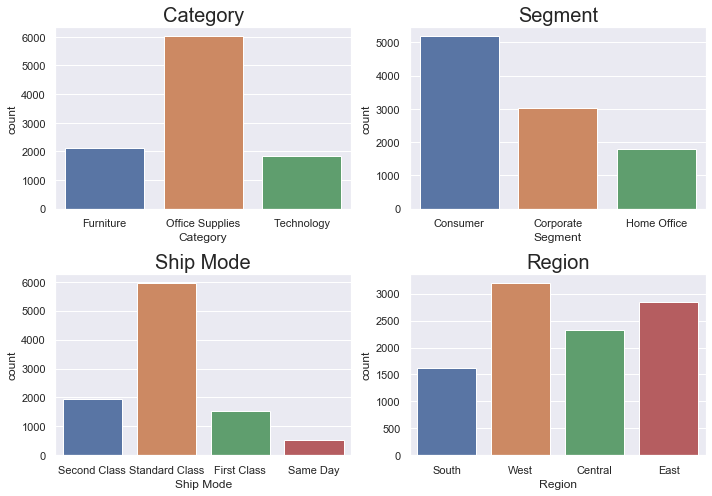

In [67]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

Text(0.5, 1.0, 'Discount')

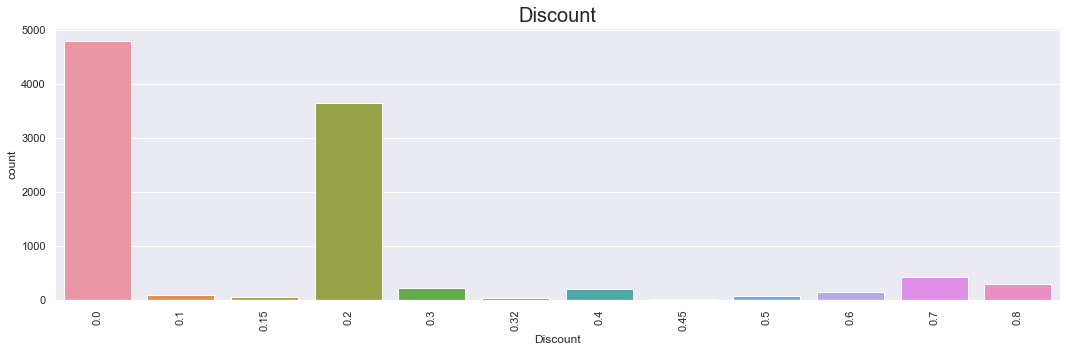

In [68]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

Text(0.5, 1.0, 'Quantity')

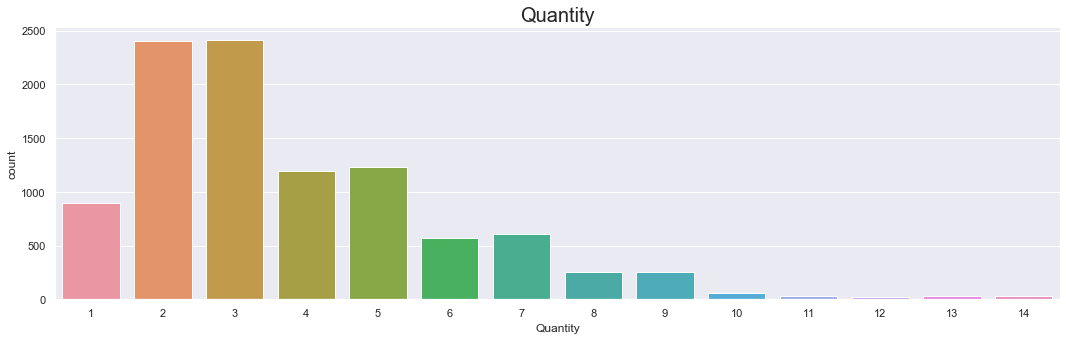

In [69]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

# Statewise Dealing Analysis

In [70]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [71]:
df2 = df['State'].value_counts()
df2.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [91]:
# Average number of deal per state 
df['State'].value_counts().mean()

203.9591836734694

Text(0.5, 1.0, 'State Wise Dealings')

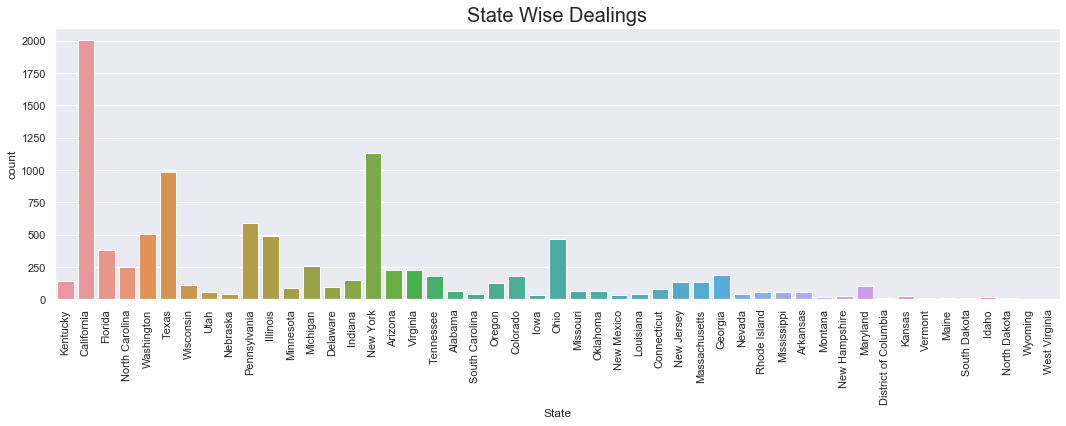

In [72]:
plt.figure(figsize=(18,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('State Wise Dealings',fontsize=20)

Top 3 state where deals are Highest.
    
    1- Califonia
    2- New York
    3- Texas

Lowest Number of dealings : Wyoming

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors


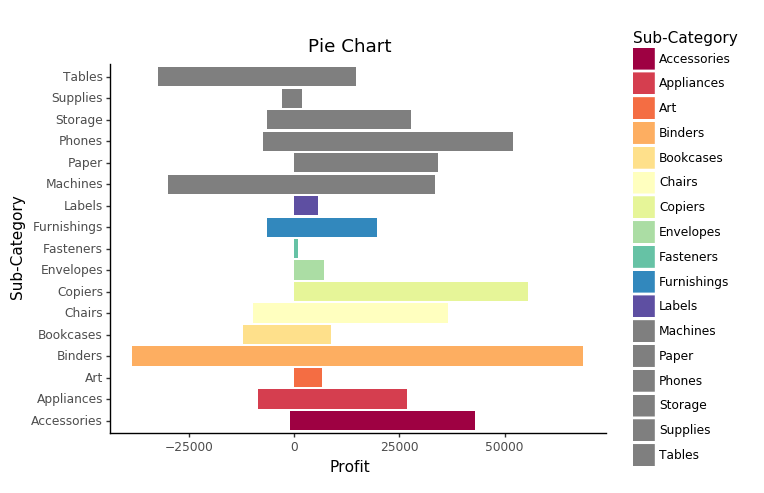

<ggplot: (-9223371911330187316)>

In [73]:
from plotnine import *
Profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

# Observations From Above Chart

1-"Binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (reason can may be because of discounts given on binders subcategory).

2-"Copiers" sub-category has gained highest amount of profit with no loss.

3-suffering from highest loss is machines.

4-There are other sub-categories too haven't faced any kind of losses but their profit margins are also low.

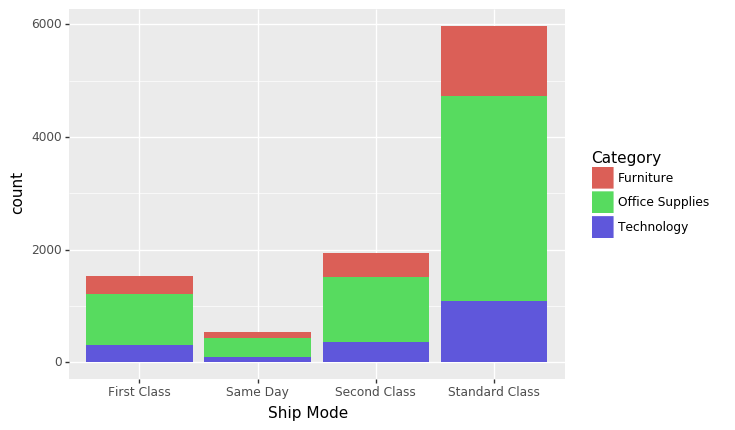

<ggplot: (-9223371911330196688)>

In [74]:
ggplot(df, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

Now explore some outliers in our distribution

# Dealing Analysis City Wise

In [94]:
df3 = df['City'].value_counts()
df3 = df3.head(60)

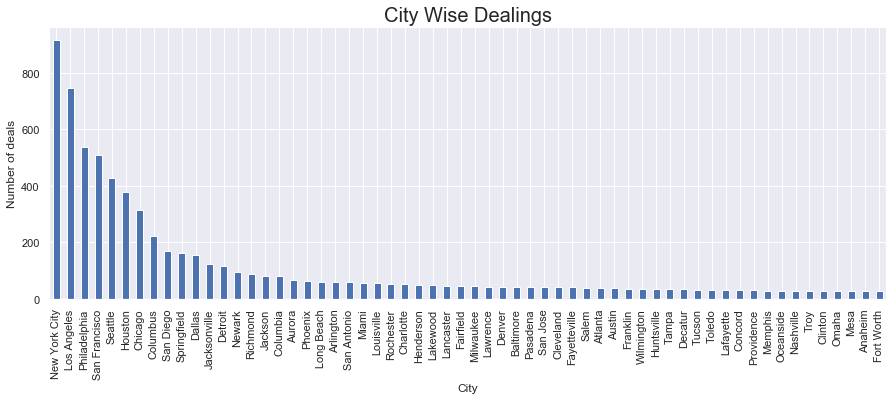

In [95]:
df3.plot(kind='bar',figsize=(15,5))
plt.ylabel('Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 city where deals are Highest.

1. New York City
2. Los Angeles
3. Philadelphia

In [96]:
#Average number of deal per city
df['City'].value_counts().mean()

18.821092278719398

# Analysis of Profit Discount and Sell

# [1] Category Wise Analysis

In [98]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [99]:
df_category= df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


Text(0.5, 1.0, 'Category wise analysis')

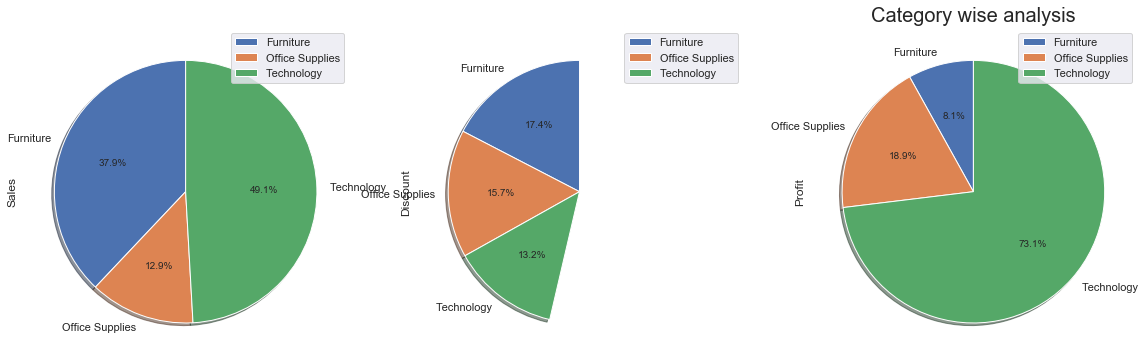

In [152]:
df_category.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 50),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_category.index)
plt.title('Category wise analysis',fontsize=20)

# [2] Sub-Category Wise Analysis 

In [156]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


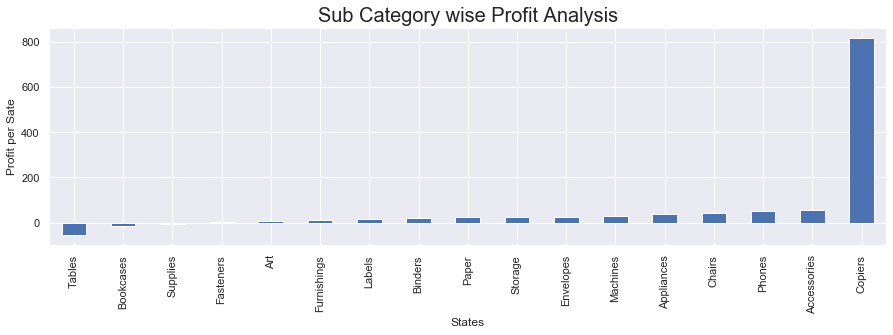

In [162]:
# Profit Analysis

df_sub_category=df_sub_category.sort_values('Profit')

df_sub_category['Profit'].plot(kind = 'bar', figsize = (15,4))
plt.title('Sub Category wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

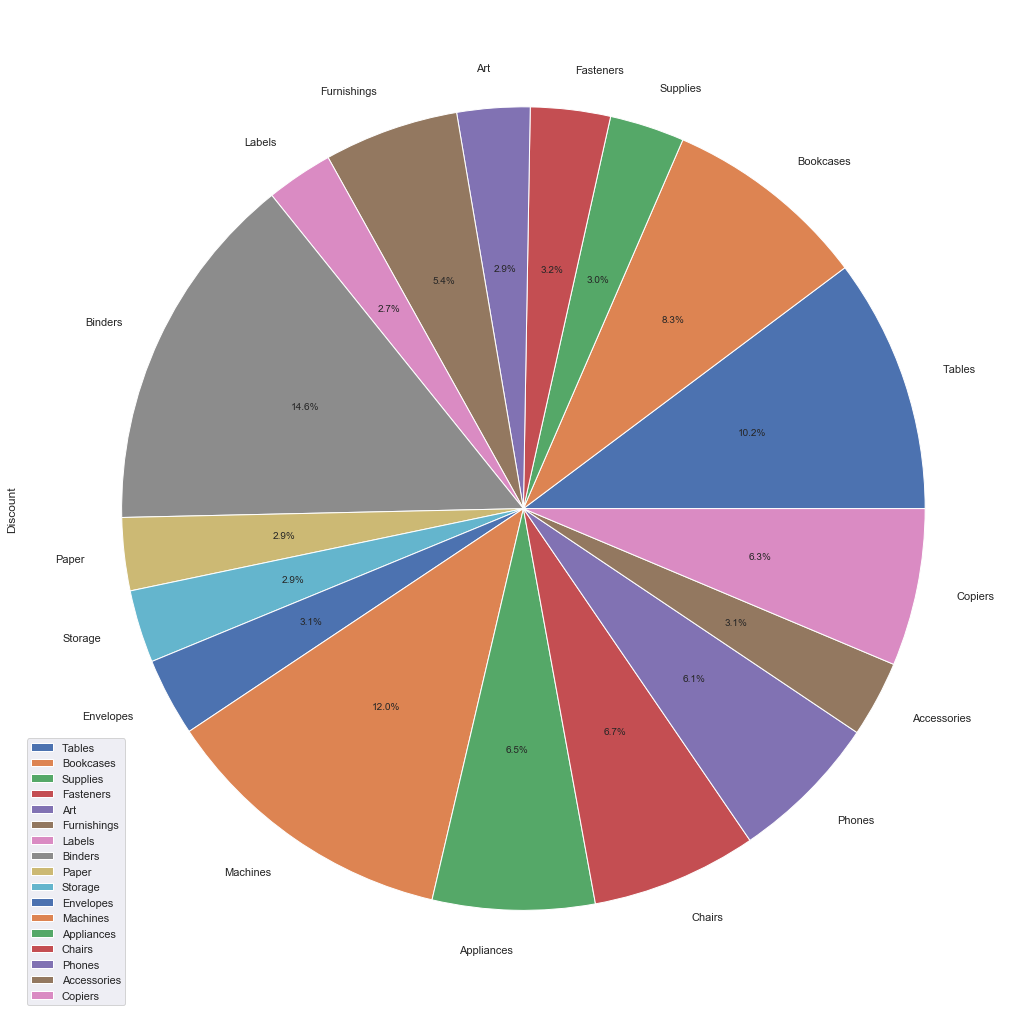

In [171]:
# Discount Analysis
df_sub_category["Discount"].plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_sub_category.index)
plt.legend()

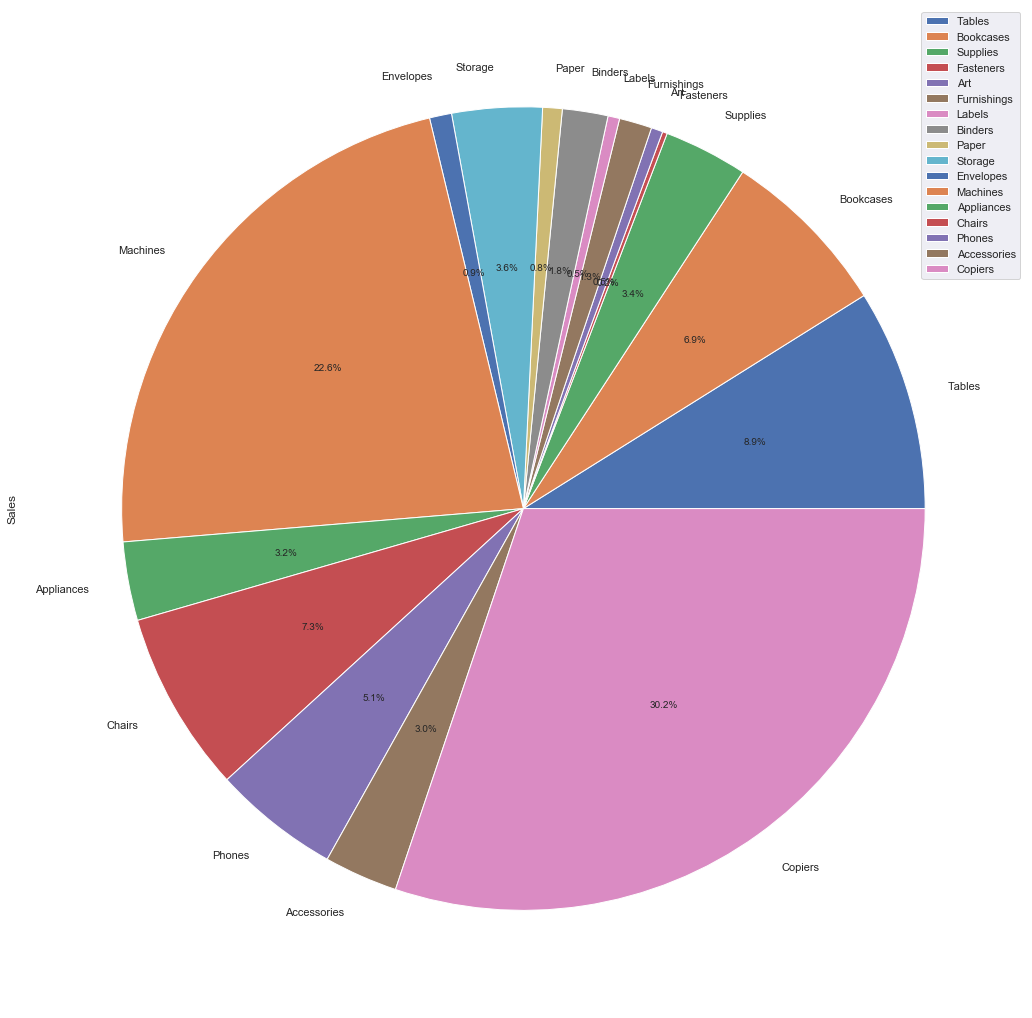

In [169]:
# Sales Analysis
df_sub_category["Sales"].plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_sub_category.index)
plt.xticks(rotation = 90)
plt.legend()

# [3] State Wise Analysis

In [120]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [121]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


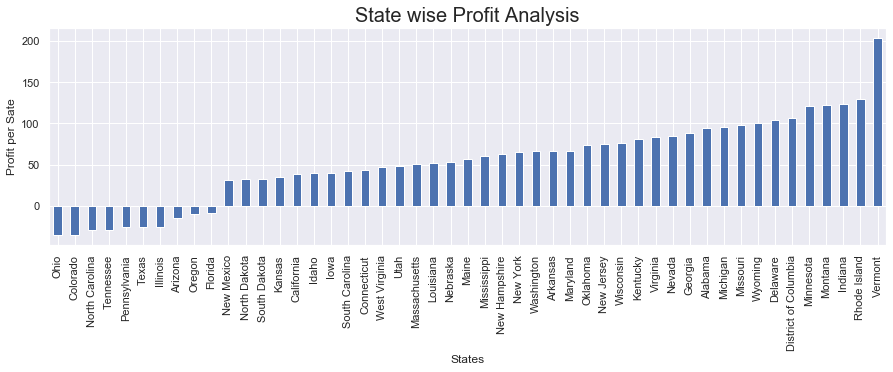

In [131]:
#Profit Analysis

df_state_sorted=df_state.sort_values('Profit')

df_state_sorted['Profit'].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

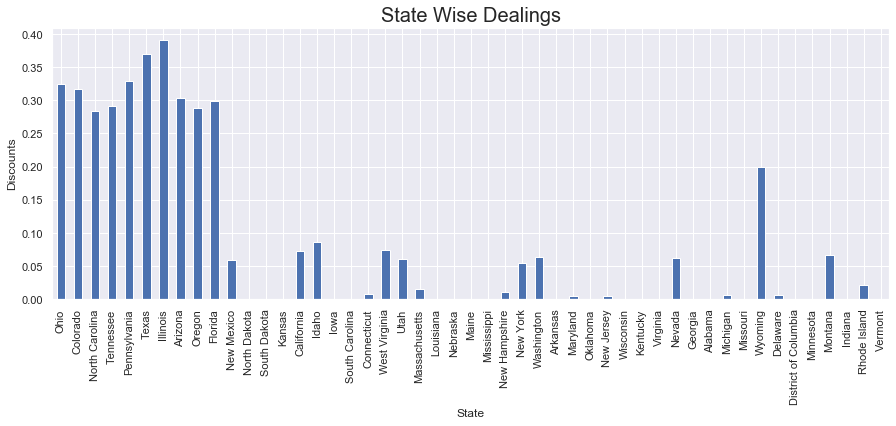

In [133]:
#Discount Analysis
df_state_sorted['Discount'].plot(kind='bar',figsize=(15,5))
plt.ylabel('Discounts')
plt.xlabel('State')

plt.title('State Wise Discounts', fontsize = 20)
plt.show()

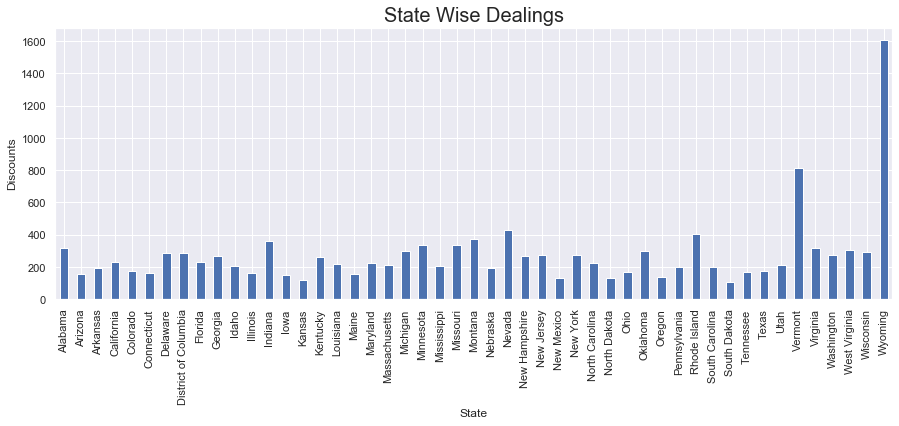

In [135]:
#Sale Analysis
df_state['Sales'].plot(kind='bar',figsize=(15,5))
plt.ylabel('Sales')
plt.xlabel('State')

plt.title('State Wise Sales', fontsize = 20)
plt.show()

# [4] City Wise Analysis

In [136]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city.head(10)

,Sales,Discount,Profit
City,,,
Aberdeen,25.500000,0.000000,6.630000
Abilene,1.392000,0.800000,-3.758400
Akron,129.999333,0.357143,-8.887410
Albuquerque,158.582857,0.057143,45.292007
Alexandria,344.973125,0.000000,19.913644
Allen,72.551500,0.375000,-9.969375
Allentown,121.893143,0.271429,-32.350057
Altoona,10.225500,0.450000,-0.591750
Amarillo,377.306280,0.272000,-38.796830


Text(0.5, 1.0, 'City wise analysis (High Profit)')

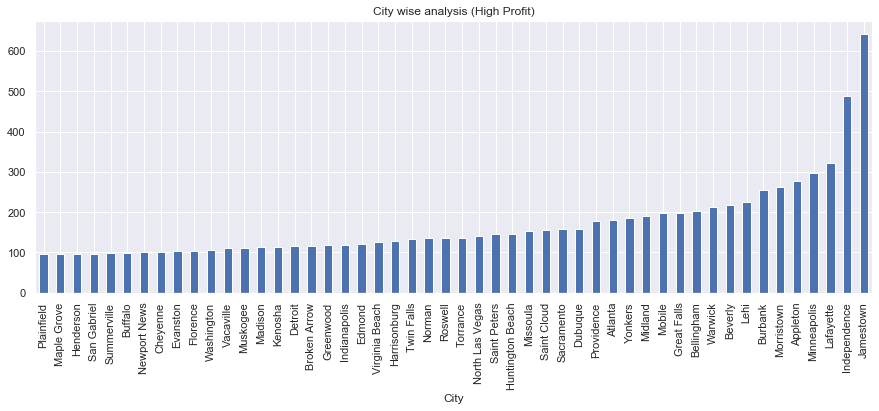

In [142]:
#Profit Analysis

# For High Profits
df_city = df_city.sort_values('Profit')

df_city['Profit'].tail(50).plot(kind='bar',figsize=(15,5))
plt.title('City wise analysis (High Profit)')


Text(0.5, 1.0, 'City wise analysis (Low Profit) ')

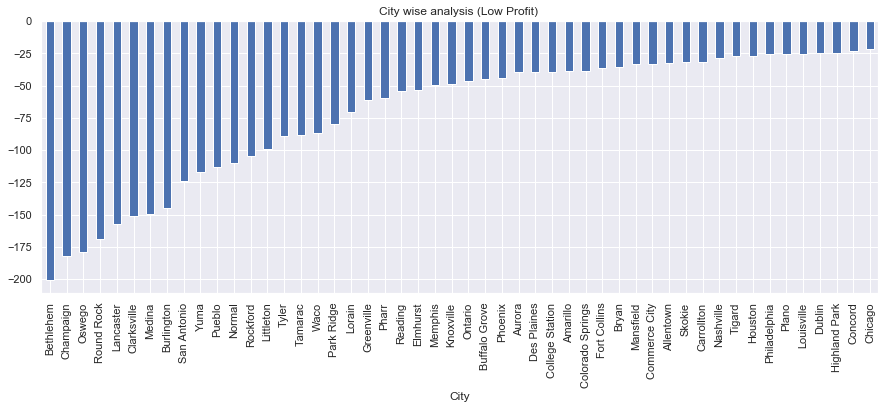

In [143]:
# For Low Profits
df_city = df_city.sort_values('Profit')

df_city['Profit'].head(50).plot(kind='bar',figsize=(15,5))
plt.title('City wise analysis (Low Profit) ')

# [5] Region Wise Analysis

In [146]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region.head()

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


Text(0.5, 1.0, 'Region wise analysis')

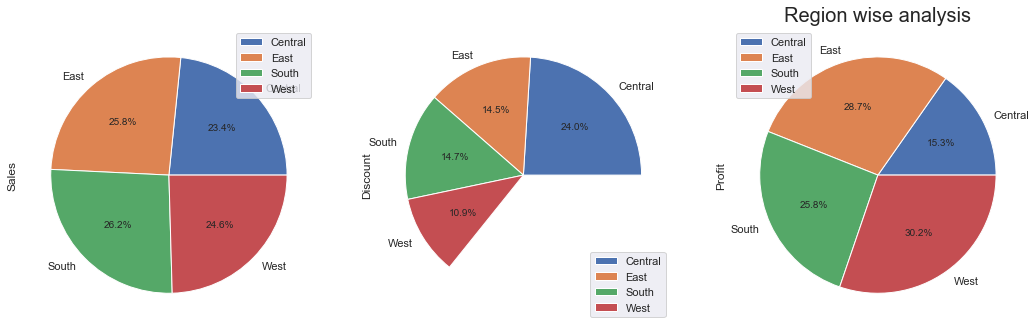

In [149]:
df_region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = df_region.index)

plt.title('Region wise analysis',fontsize=20)

# [6] SHIP MODE WISE ANALYSIS

In [153]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [154]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
df_shipmode.head()

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3ABE70B88>,
      dtype=object)

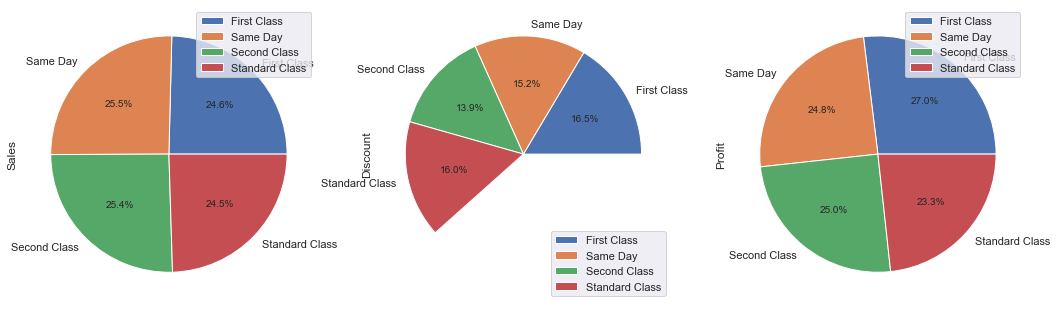

In [155]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

# Conclusion

* Profit is more than that of sale but there are some areas where profit could be increased.

* Profit and Discount is high in First Class

* Sales is high for Same day ship
 
* Sales is high for Same day ship

* Sub-category: Copier: High Profit & sales

* Sub-category: Binders , Machines and then tables have high Discount.

* Category: Maximun sales and Profit obtain in Technology.

* Category: Minimun profit obtain in Furniture

* State: Vermont: Highest Profit

* State: Ohio: Lowest Profit

* Segment: Home-office: High Profit & sales
        
* Region : Profits Are High in West region

* Here is top 3 city where deals are Highest.

    * New York City

    * Los Angeles

    * Philadelphia

* Sales and Profit are Moderately Correlated.

* Quantity and Profit are less Moderately Correlated.

* Discount and Profit are Negatively Correlated

* Here is top 3 state where deals are Highest.

    * Califonia

    * New York

    * Texas

* Wyoming : Lowest Number of deal,Highest amount of sales